In [4]:
%pip install scikit-learn
%pip install matplotlib
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [6]:
dataset = pd.read_csv("./dataset/merged_csv/cleaned_merged_heart_dataset.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [7]:
X = dataset.drop('target', axis=1)
y = dataset['target']

In [ ]:
# Install necessary libraries
%pip install numpy pandas scikit-learn matplotlib seaborn tqdm

Processing random states: 100%|██████████| 16/16 [00:00<00:00, 142.81it/s]



Best Accuracy: 97.25% with random_state=36994

Final Model Accuracy with best random_state=36994: 97.25%
Precision: 0.97
Recall: 0.97
F1-Score: 0.97

Confusion Matrix:
[[206   7]
 [  5 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       213
           1       0.97      0.98      0.97       224

    accuracy                           0.97       437
   macro avg       0.97      0.97      0.97       437
weighted avg       0.97      0.97      0.97       437



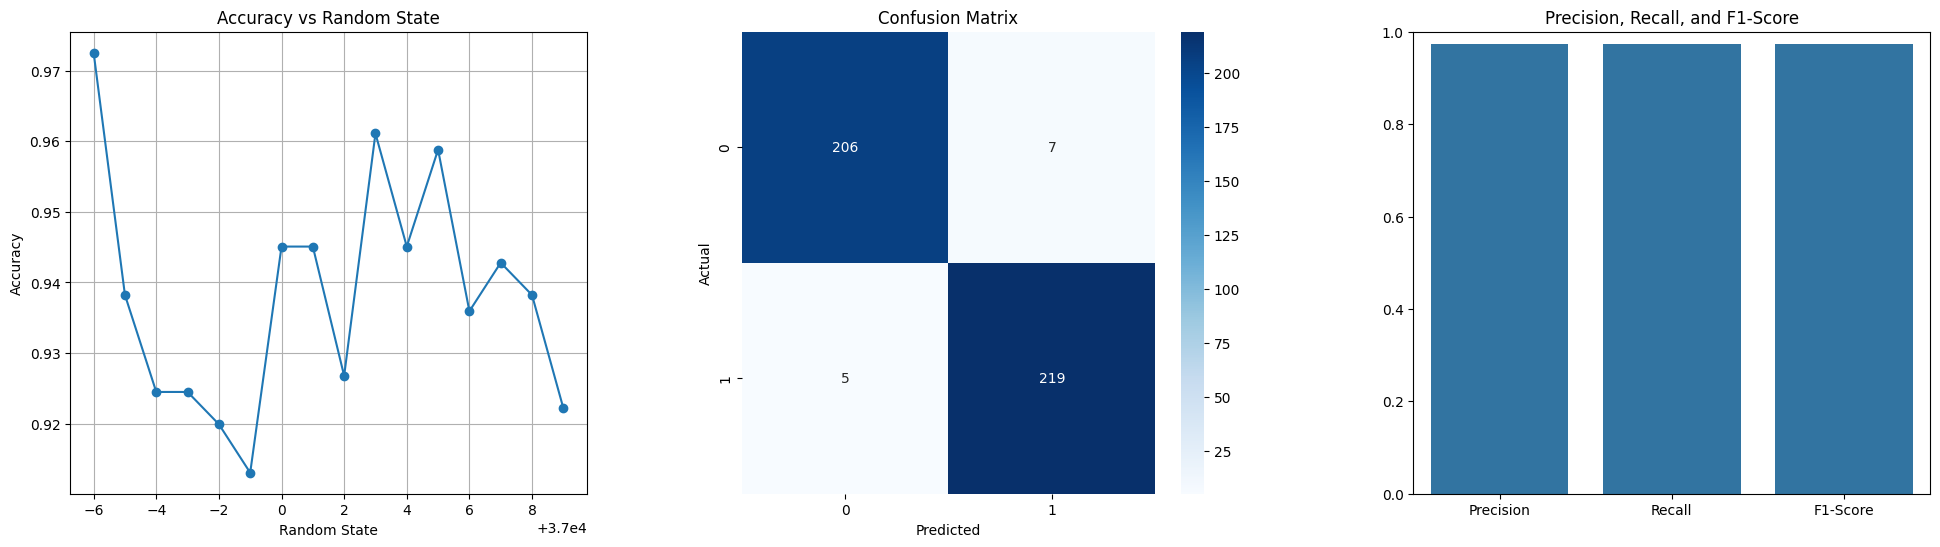

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tqdm import tqdm

# Assuming X and y are already defined and preprocessed

# Step 1: Impute missing values in features using the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Variables to store the best accuracy and the corresponding random_state
best_accuracy = 0
best_random_state = None
accuracies = []

# Step 2: Loop through random_state values from 36994 to 100000 with a progress bar
for state in tqdm(range(36994, 37010), desc="Processing random states"):  # Adjust range for demonstration
    # Split the data into training and testing sets with the current random_state
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=state)

    # Initialize the Decision Tree classifier with the current random_state
    model = DecisionTreeClassifier(random_state=state)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((state, accuracy))
    
    # Update the best accuracy and random_state if the current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = state

# Print the best result found during the loop
print(f"\nBest Accuracy: {best_accuracy * 100:.2f}% with random_state={best_random_state}")

# Step 3: Retrain the model using the best random_state
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=best_random_state)

# Initialize the Decision Tree classifier with the best random_state
best_model = DecisionTreeClassifier(random_state=best_random_state)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
best_accuracy_final = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

# Output the final metrics
print(f"\nFinal Model Accuracy with best random_state={best_random_state}: {best_accuracy_final * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Step 4: Visualization with subplots

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot accuracy vs random_state
states, accs = zip(*accuracies)
axs[0].plot(states, accs, marker='o')
axs[0].set_xlabel('Random State')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy vs Random State')
axs[0].grid(True)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')
axs[1].set_title('Confusion Matrix')

# Plot Precision, Recall, and F1-Score
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]
sns.barplot(x=metrics, y=values, ax=axs[2])
axs[2].set_ylim(0, 1)
axs[2].set_title('Precision, Recall, and F1-Score')

# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin\dot.exe'

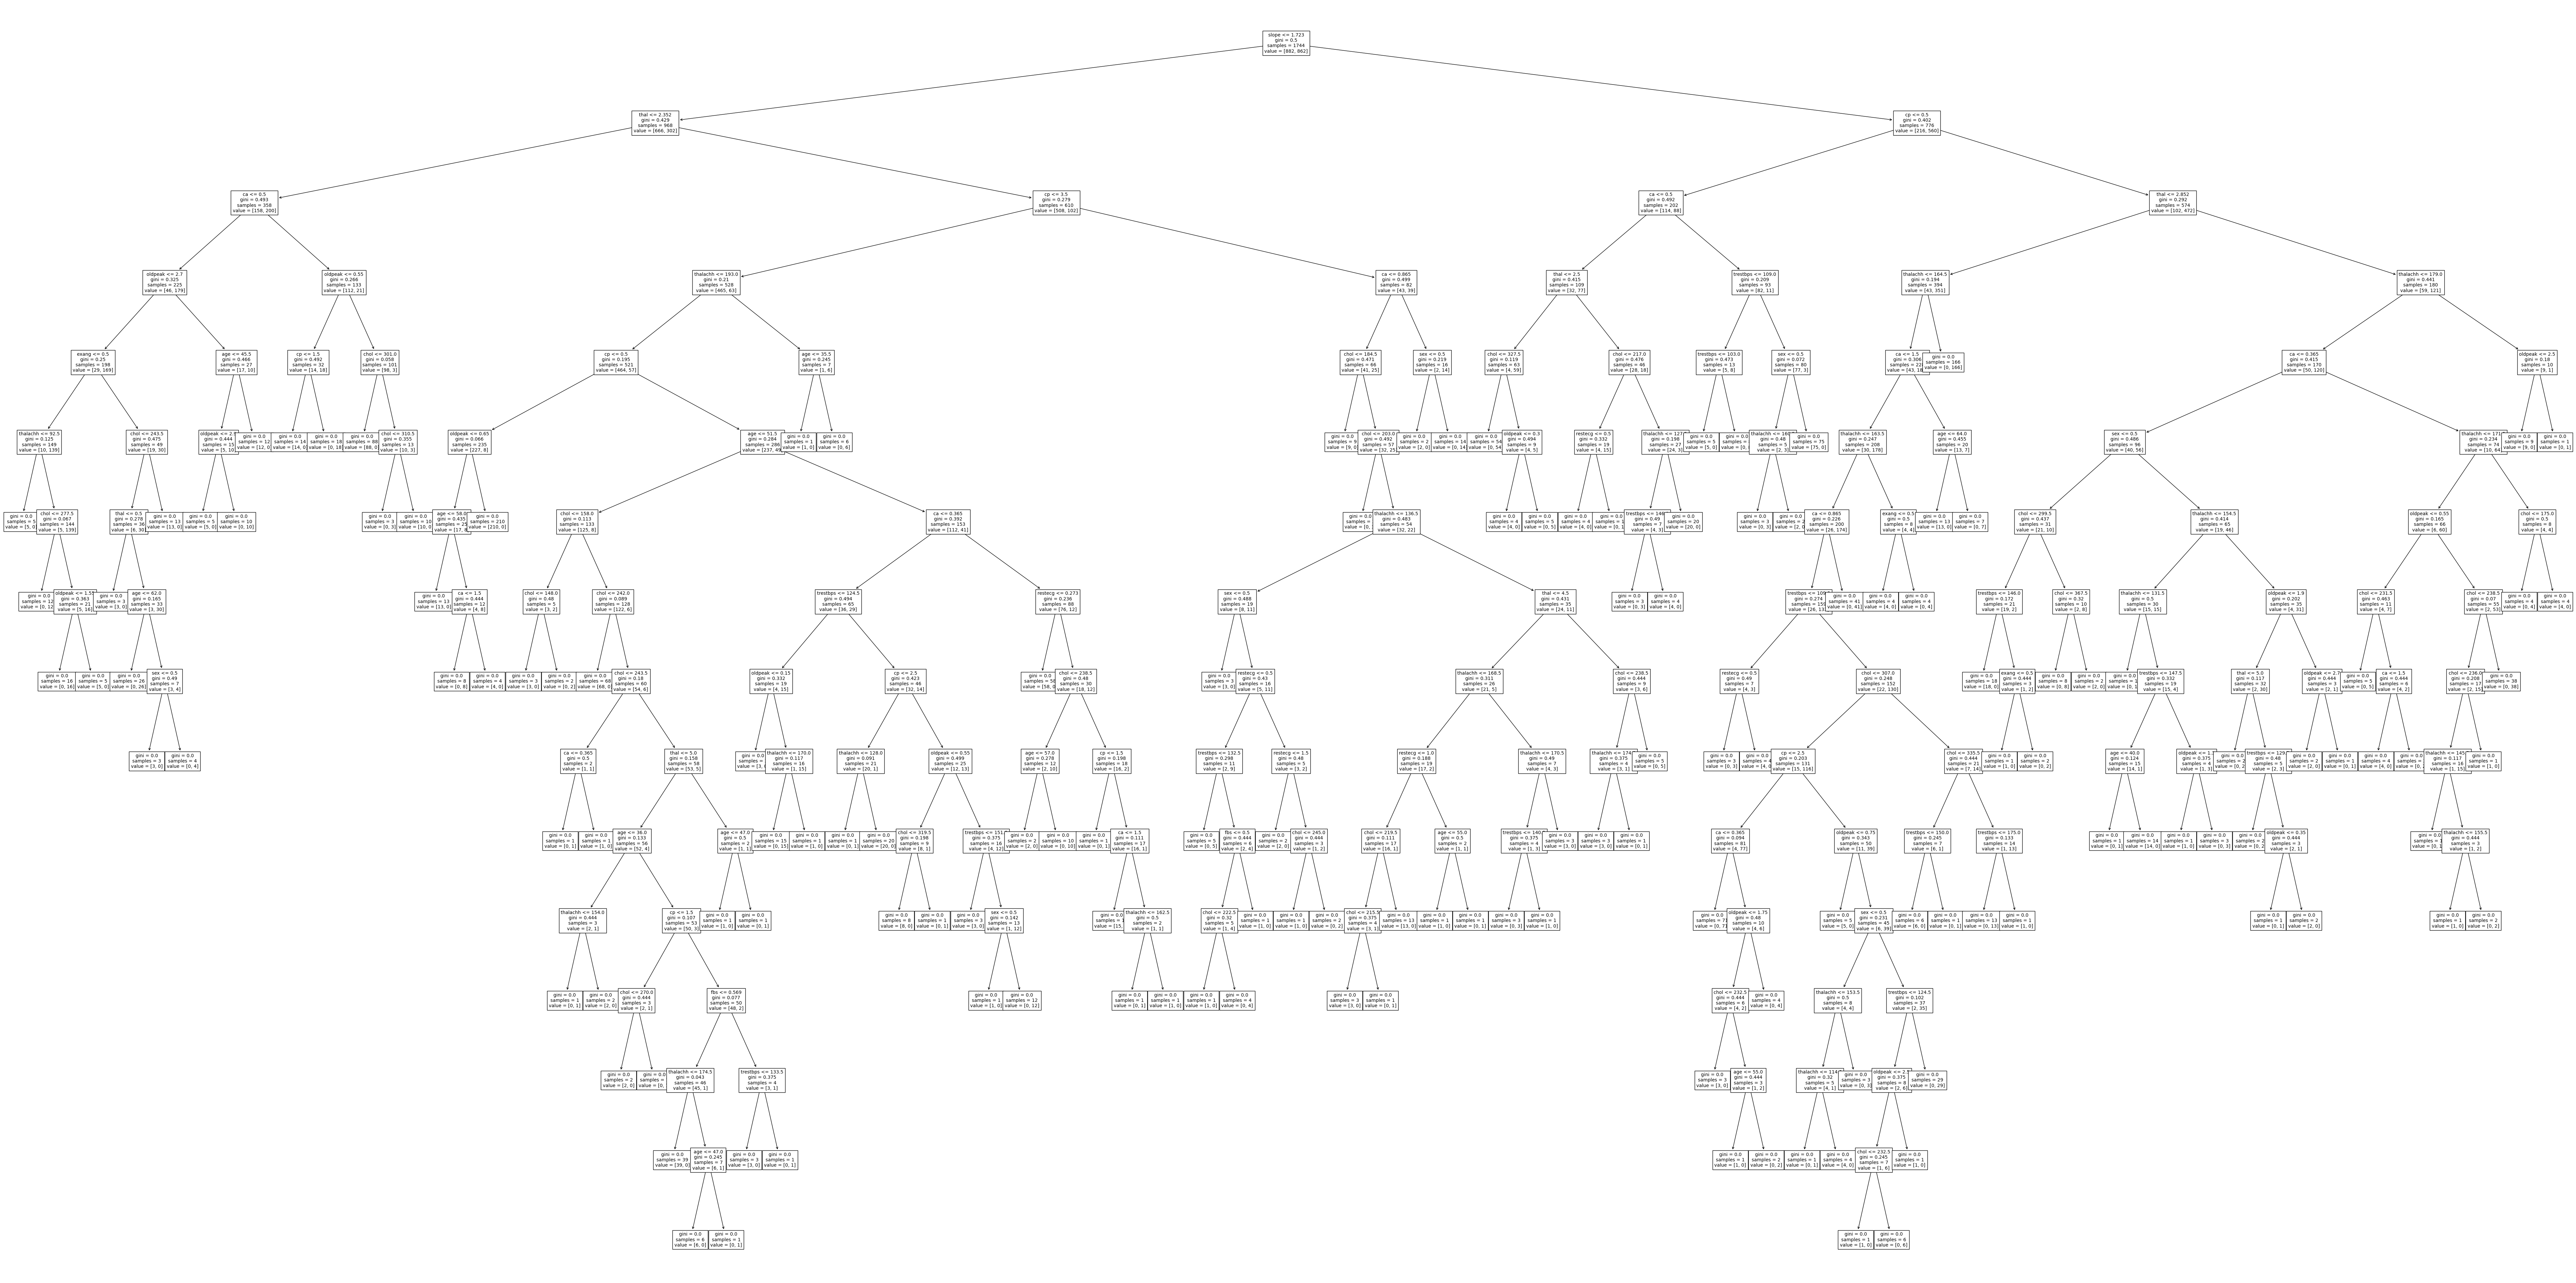

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

# Set figure size (width, height) in inches
plt.figure(figsize=(100, 50))

# Plot the tree with desired fontsize and label
tree.plot_tree(model, fontsize=10, feature_names=X.columns)

# Display the plot
plt.show()

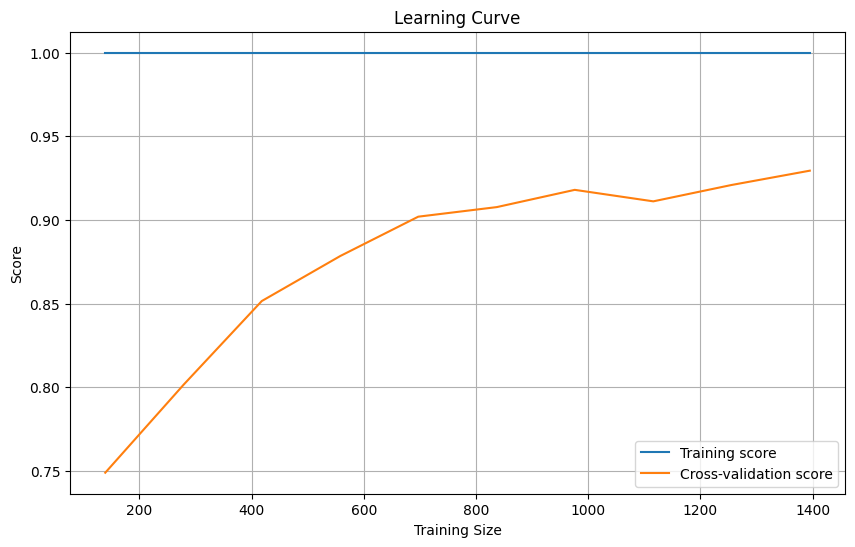

In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


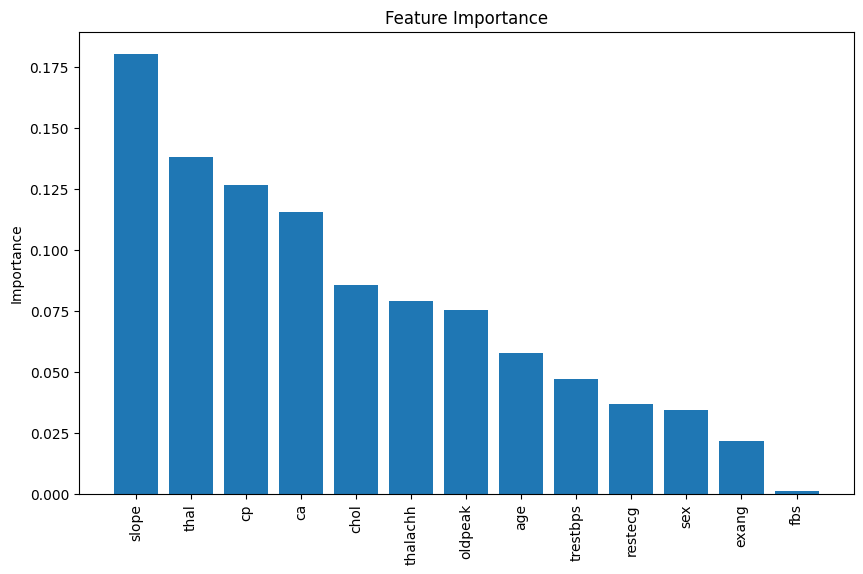

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.ylabel('Importance')
plt.show()